<a href="https://colab.research.google.com/github/Alenushka2013/datasharing/blob/master/Genesis_14_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 100)

In [2]:
df = pd.read_csv('/content/breeds_ads_case.csv')

ad_id: ідентифікатор реклами

breed: порода собаки

network: джерело залучення користувачів

background: фон залучення

audience: стать аудиторії, на яку спрямована реклама

country: на які країни спрямована реклама

impressions: кількість показів реклами

clicks: кількість кліків по рекламі

users: кількість зареєстрованих користувачів, яких привела реклама

с1_cnt: кількість користувачів, котрі зробили першу купівлю

revenue_7d: скільки виручки принесли користувачі за перші 7 днів після реєстрації

costs: витрати на рекламу

In [3]:
df.head(5)

,ad_id,breed,network,background,audience,country,clicks,impressions,users,c1_cnt,revenue_7d,costs
0,NOqRpJFjh5+jGyYIsGPgLPV25jR72Eg0kiX0w8ymcEM=,breed_3,source_1,Other,male,Tier-1,NaN,NaN,0,0.0,NaN,NaN
1,NOqRpJFjh5+jGyYIsGPgLPV25jR72Eg0kiX0w8ymcEM=,breed_1,source_1,Fill,male,Tier-1,NaN,NaN,0,0.0,NaN,NaN
2,v8AZr8KE9LQB1fNEC3MSnB2ezIA3tkpkU9FoXdtB3kU=,other,source_5,Other,male,Tier-1,6047.0,1502248.0,19,2.0,2340.0,554.22
3,x2iwBSe8rsZb3E+vT5Ov0OjstX/cxcEXFIUTcahOqc4=,breed_2,source_3,Fill,male,Tier-1,439.0,23628.0,3,0.0,654.0,163.70
4,wk0oGRxCSGLPfA/eTBJtCJtVu06ZkIIf+18SF8lDp9I=,breed_2,source_3,Default,male,Tier-1,1403.0,65792.0,5,1.0,315.0,163.70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38289 entries, 0 to 38288
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ad_id        38289 non-null  object 
 1   breed        38289 non-null  object 
 2   network      38289 non-null  object 
 3   background   38289 non-null  object 
 4   audience     38289 non-null  object 
 5   country      38289 non-null  object 
 6   clicks       30178 non-null  float64
 7   impressions  30221 non-null  float64
 8   users        38289 non-null  int64  
 9   c1_cnt       38289 non-null  float64
 10  revenue_7d   27116 non-null  float64
 11  costs        30241 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 3.5+ MB


In [5]:
# Обробка можливого ділення на нуль
df['impressions'] = df['impressions'].replace(0, np.nan)
df['clicks'] = df['clicks'].replace(0, np.nan)
df['costs'] = df['costs'].replace(0, np.nan)

In [6]:
df.describe()

,clicks,impressions,users,c1_cnt,revenue_7d,costs
count,2.868900e+04,2.952300e+04,38289.000000,38289.000000,27116.000000,29612.000000
mean,2.004389e+03,2.294577e+05,5.850975,0.267681,209.636384,132.496266
std,2.318389e+04,2.858563e+06,31.569202,1.417760,1110.878135,491.657881
min,1.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.010000
25%,2.500000e+01,1.071000e+03,0.000000,0.000000,0.000000,7.980000
50%,1.420000e+02,6.285000e+03,0.000000,0.000000,0.000000,30.485000
75%,5.690000e+02,3.207250e+04,3.000000,0.000000,47.000000,105.510000
max,1.790029e+06,2.050455e+08,2282.000000,85.000000,61091.000000,23018.040000


In [7]:
# Розрахунок метрик для кожного рядка (ad_id)
df['CTR'] = (df['clicks'] / df['impressions']) * 100 # %
df['CR_users'] = (df['users'] / df['clicks']) * 100 # %
df['CR_c1'] = (df['c1_cnt'] / df['users']) * 100 # %
df['CPA_users'] = df['costs'] / df['users']
df['CPA_c1'] = df['costs'] / df['c1_cnt']
df['ROAS'] = (df['revenue_7d'] / df['costs']) * 100 # %

# 1 Які комбінації зображень на креативах є найбільш привабливими для різних аудиторій (чоловіки/жінки, країни)?

In [8]:
# Визначаємо групувальні стовпці
grouping_cols = ['breed', 'background', 'audience', 'country']

agg_df = df.groupby(grouping_cols).agg(
    Total_Impressions=('impressions', 'sum'),
    Total_Clicks=('clicks', 'sum'),
    Total_Users=('users', 'sum'),
    Total_C1_Cnt=('c1_cnt', 'sum'),
    Total_Revenue_7d=('revenue_7d', 'sum'),
    Total_Costs=('costs', 'sum')
).reset_index()

# Перерахунок агрегованих метрик
agg_df['Agg_CTR'] = (agg_df['Total_Clicks'] / agg_df['Total_Impressions']) * 100
agg_df['Agg_CR_users'] = (agg_df['Total_Users'] / agg_df['Total_Clicks']) * 100
agg_df['Agg_CR_c1'] = (agg_df['Total_C1_Cnt'] / agg_df['Total_Users']) * 100
agg_df['Agg_CPA_users'] = agg_df['Total_Costs'] / agg_df['Total_Users']
agg_df['Agg_CPA_c1'] = agg_df['Total_Costs'] / agg_df['Total_C1_Cnt']
agg_df['Agg_ROAS'] = (agg_df['Total_Revenue_7d'] / agg_df['Total_Costs']) * 100

# Замінити inf та NaN на 0 або інші прийнятні значення
agg_df = agg_df.replace([np.inf, -np.inf], np.nan)
agg_df = agg_df.fillna(0)

print("\nАгреговані метрики за (breed, background), аудиторією та країною:")
display(agg_df.round(2))


Агреговані метрики за (breed, background), аудиторією та країною:


,breed,background,audience,country,Total_Impressions,Total_Clicks,Total_Users,Total_C1_Cnt,Total_Revenue_7d,Total_Costs,Agg_CTR,Agg_CR_users,Agg_CR_c1,Agg_CPA_users,Agg_CPA_c1,Agg_ROAS
0,Mix,City,female,Tier-1,121780.0,1798.0,6,0.0,93.0,258.70,1.48,0.33,0.00,43.12,0.00,35.95
1,Mix,Default,female,Other,9975830.0,106175.0,152,4.0,593.0,797.24,1.06,0.14,2.63,5.24,199.31,74.38
2,Mix,Default,female,Tier-1,2035507.0,36695.0,331,18.0,6776.0,7955.59,1.80,0.90,5.44,24.04,441.98,85.17
3,Mix,Default,male,Other,71806.0,2045.0,10,0.0,4.0,119.75,2.85,0.49,0.00,11.98,0.00,3.34
4,Mix,Default,male,Tier-1,865023.0,19133.0,224,13.0,4347.0,4955.06,2.21,1.17,5.80,22.12,381.16,87.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,other,Nature,male,Tier-1,8150.0,155.0,2,0.0,0.0,40.00,1.90,1.29,0.00,20.00,0.00,0.00
126,other,Other,female,Other,7791545.0,174273.0,882,36.0,7937.0,7981.74,2.24,0.51,4.08,9.05,221.72,99.44
127,other,Other,female,Tier-1,52144848.0,896770.0,12655,714.0,284408.0,178822.95,1.72,1.41,5.64,14.13,250.45,159.04
128,other,Other,male,Other,384856099.0,3026308.0,4347,99.0,46149.0,29760.53,0.79,0.14,2.28,6.85,300.61,155.07


In [9]:
# Пошук Найкращих/Найгірших Креативів (комбінацій (breed, background)):
agg_df.sort_values(by=['Agg_ROAS', 'Agg_CPA_c1'], ascending=[False, True]).head(10)

,breed,background,audience,country,Total_Impressions,Total_Clicks,Total_Users,Total_C1_Cnt,Total_Revenue_7d,Total_Costs,Agg_CTR,Agg_CR_users,Agg_CR_c1,Agg_CPA_users,Agg_CPA_c1,Agg_ROAS
73,breed_2,Home,female,Tier-1,4.528758e+05,2797.0,11,0.0,1013.00,210.06,0.617609,0.393279,0.000000,19.096364,0.000000,482.243169
87,breed_3,City,female,Tier-1,5.831600e+04,1192.0,29,3.0,2937.00,1049.67,2.044036,2.432886,10.344828,36.195517,349.890000,279.802224
100,breed_3,Forest,male,Other,9.639827e+06,305454.0,688,23.0,15776.00,6789.04,3.168667,0.225238,3.343023,9.867791,295.175652,232.374533
92,breed_3,Default,male,Other,8.487516e+07,2022832.0,4396,121.0,89962.40,38752.28,2.383303,0.217319,2.752502,8.815350,320.266777,232.147373
91,breed_3,Default,female,Tier-1,2.700387e+06,40439.0,284,26.4,25050.30,10944.58,1.497526,0.702292,9.295775,38.537254,414.567424,228.883155
23,Mix,Pattern,female,Tier-1,3.171520e+05,11977.0,231,20.0,20024.00,9267.64,3.776423,1.928697,8.658009,40.119654,463.382000,216.063636
6,Mix,Fill,female,Tier-1,6.124110e+05,22078.0,315,27.0,25715.00,11978.82,3.605095,1.426760,8.571429,38.028000,443.660000,214.670560
93,breed_3,Default,male,Tier-1,2.267456e+07,372839.0,5070,281.6,188595.00,92652.38,1.644306,1.359836,5.554241,18.274631,329.021236,203.551166
106,breed_3,Nature,female,Other,2.004876e+07,273431.0,300,13.0,7993.00,4095.38,1.363830,0.109717,4.333333,13.651267,315.029231,195.171144
43,breed_1,Home,male,Other,6.486877e+08,5403598.0,4933,128.0,66268.75,34275.61,0.833004,0.091291,2.594770,6.948228,267.778203,193.340833


In [10]:
# Пошук Найкращих/Найгірших Креативів (комбінацій (breed, background)) для жінок:
agg_df[agg_df.audience == 'female'].sort_values(by=['Agg_ROAS', 'Agg_CPA_c1'], ascending=[False, True]).head(10)

,breed,background,audience,country,Total_Impressions,Total_Clicks,Total_Users,Total_C1_Cnt,Total_Revenue_7d,Total_Costs,Agg_CTR,Agg_CR_users,Agg_CR_c1,Agg_CPA_users,Agg_CPA_c1,Agg_ROAS
73,breed_2,Home,female,Tier-1,452875.75,2797.0,11,0.0,1013.00,210.06,0.617609,0.393279,0.000000,19.096364,0.000000,482.243169
87,breed_3,City,female,Tier-1,58316.00,1192.0,29,3.0,2937.00,1049.67,2.044036,2.432886,10.344828,36.195517,349.890000,279.802224
91,breed_3,Default,female,Tier-1,2700386.70,40439.0,284,26.4,25050.30,10944.58,1.497526,0.702292,9.295775,38.537254,414.567424,228.883155
23,Mix,Pattern,female,Tier-1,317152.00,11977.0,231,20.0,20024.00,9267.64,3.776423,1.928697,8.658009,40.119654,463.382000,216.063636
6,Mix,Fill,female,Tier-1,612411.00,22078.0,315,27.0,25715.00,11978.82,3.605095,1.426760,8.571429,38.028000,443.660000,214.670560
106,breed_3,Nature,female,Other,20048756.00,273431.0,300,13.0,7993.00,4095.38,1.363830,0.109717,4.333333,13.651267,315.029231,195.171144
102,breed_3,Home,female,Other,5392495.00,94282.0,356,25.0,10253.75,5628.94,1.748393,0.377591,7.022472,15.811629,225.157600,182.161295
127,other,Other,female,Tier-1,52144848.00,896770.0,12655,714.0,284408.00,178822.95,1.719767,1.411176,5.642039,14.130616,250.452311,159.044463
33,breed_1,Fill,female,Other,231344.00,6700.0,28,1.0,464.00,294.03,2.896120,0.417910,3.571429,10.501071,294.030000,157.807026
22,Mix,Pattern,female,Other,90388.00,3604.0,36,2.0,719.00,479.24,3.987255,0.998890,5.555556,13.312222,239.620000,150.029213


In [11]:
# Пошук Найкращих/Найгірших Креативів (комбінацій (breed, background)) для чоловіків:
agg_df[agg_df.audience == 'male'].sort_values(by=['Agg_ROAS', 'Agg_CPA_c1'], ascending=[False, True]).head(10)

,breed,background,audience,country,Total_Impressions,Total_Clicks,Total_Users,Total_C1_Cnt,Total_Revenue_7d,Total_Costs,Agg_CTR,Agg_CR_users,Agg_CR_c1,Agg_CPA_users,Agg_CPA_c1,Agg_ROAS
100,breed_3,Forest,male,Other,9639827.0,305454.0,688,23.00,15776.00,6789.04,3.168667,0.225238,3.343023,9.867791,295.175652,232.374533
92,breed_3,Default,male,Other,84875155.2,2022832.0,4396,121.00,89962.40,38752.28,2.383303,0.217319,2.752502,8.815350,320.266777,232.147373
93,breed_3,Default,male,Tier-1,22674556.3,372839.0,5070,281.60,188595.00,92652.38,1.644306,1.359836,5.554241,18.274631,329.021236,203.551166
43,breed_1,Home,male,Other,648687744.0,5403598.0,4933,128.00,66268.75,34275.61,0.833004,0.091291,2.594770,6.948228,267.778203,193.340833
67,breed_2,Fill,male,Other,4508178.0,139796.0,1218,57.00,22016.00,11446.11,3.100942,0.871270,4.679803,9.397463,200.808947,192.344823
36,breed_1,Fill,male,Tier-1,46614283.0,398426.0,4343,162.00,155869.00,85427.93,0.854729,1.090039,3.730140,19.670258,527.332901,182.456721
70,breed_2,Forest,male,Other,1893723.0,65913.0,271,10.00,5763.00,3162.80,3.480604,0.411148,3.690037,11.670849,316.280000,182.211964
112,breed_3,Other,male,Other,30313836.0,533128.0,2737,88.00,52368.00,28998.89,1.758695,0.513385,3.215199,10.595137,329.532841,180.586222
75,breed_2,Home,male,Tier-1,125104684.5,601318.0,1976,135.75,97235.25,54375.00,0.480652,0.328611,6.869939,27.517713,400.552486,178.823448
78,breed_2,Nature,male,Other,65365728.0,410340.0,1347,34.00,16837.00,9471.08,0.627760,0.328264,2.524128,7.031240,278.561176,177.772757


In [12]:
# Пошук Найкращих/Найгірших Креативів (комбінацій (breed, background)) для країни 'Tier-1':
agg_df[agg_df.country == 'Tier-1'].sort_values(by=['Agg_ROAS', 'Agg_CPA_c1'], ascending=[False, True]).head(10)

,breed,background,audience,country,Total_Impressions,Total_Clicks,Total_Users,Total_C1_Cnt,Total_Revenue_7d,Total_Costs,Agg_CTR,Agg_CR_users,Agg_CR_c1,Agg_CPA_users,Agg_CPA_c1,Agg_ROAS
73,breed_2,Home,female,Tier-1,4.528758e+05,2797.0,11,0.00,1013.00,210.06,0.617609,0.393279,0.000000,19.096364,0.000000,482.243169
87,breed_3,City,female,Tier-1,5.831600e+04,1192.0,29,3.00,2937.00,1049.67,2.044036,2.432886,10.344828,36.195517,349.890000,279.802224
91,breed_3,Default,female,Tier-1,2.700387e+06,40439.0,284,26.40,25050.30,10944.58,1.497526,0.702292,9.295775,38.537254,414.567424,228.883155
23,Mix,Pattern,female,Tier-1,3.171520e+05,11977.0,231,20.00,20024.00,9267.64,3.776423,1.928697,8.658009,40.119654,463.382000,216.063636
6,Mix,Fill,female,Tier-1,6.124110e+05,22078.0,315,27.00,25715.00,11978.82,3.605095,1.426760,8.571429,38.028000,443.660000,214.670560
93,breed_3,Default,male,Tier-1,2.267456e+07,372839.0,5070,281.60,188595.00,92652.38,1.644306,1.359836,5.554241,18.274631,329.021236,203.551166
36,breed_1,Fill,male,Tier-1,4.661428e+07,398426.0,4343,162.00,155869.00,85427.93,0.854729,1.090039,3.730140,19.670258,527.332901,182.456721
75,breed_2,Home,male,Tier-1,1.251047e+08,601318.0,1976,135.75,97235.25,54375.00,0.480652,0.328611,6.869939,27.517713,400.552486,178.823448
89,breed_3,City,male,Tier-1,9.282896e+07,449716.0,1556,88.00,68084.00,38370.10,0.484457,0.345996,5.655527,24.659447,436.023864,177.440246
44,breed_1,Home,male,Tier-1,3.419327e+08,2355739.0,8720,426.00,301426.50,180211.49,0.688948,0.370160,4.885321,20.666455,423.031667,167.262642


In [13]:
# Пошук Найкращих/Найгірших Креативів (комбінацій (breed, background)) для країни 'Other':
agg_df[agg_df.country == 'Other'].sort_values(by=['Agg_ROAS', 'Agg_CPA_c1'], ascending=[False, True]).head(10)

,breed,background,audience,country,Total_Impressions,Total_Clicks,Total_Users,Total_C1_Cnt,Total_Revenue_7d,Total_Costs,Agg_CTR,Agg_CR_users,Agg_CR_c1,Agg_CPA_users,Agg_CPA_c1,Agg_ROAS
100,breed_3,Forest,male,Other,9639827.0,305454.0,688,23.0,15776.00,6789.04,3.168667,0.225238,3.343023,9.867791,295.175652,232.374533
92,breed_3,Default,male,Other,84875155.2,2022832.0,4396,121.0,89962.40,38752.28,2.383303,0.217319,2.752502,8.815350,320.266777,232.147373
106,breed_3,Nature,female,Other,20048756.0,273431.0,300,13.0,7993.00,4095.38,1.363830,0.109717,4.333333,13.651267,315.029231,195.171144
43,breed_1,Home,male,Other,648687744.0,5403598.0,4933,128.0,66268.75,34275.61,0.833004,0.091291,2.594770,6.948228,267.778203,193.340833
67,breed_2,Fill,male,Other,4508178.0,139796.0,1218,57.0,22016.00,11446.11,3.100942,0.871270,4.679803,9.397463,200.808947,192.344823
70,breed_2,Forest,male,Other,1893723.0,65913.0,271,10.0,5763.00,3162.80,3.480604,0.411148,3.690037,11.670849,316.280000,182.211964
102,breed_3,Home,female,Other,5392495.0,94282.0,356,25.0,10253.75,5628.94,1.748393,0.377591,7.022472,15.811629,225.157600,182.161295
112,breed_3,Other,male,Other,30313836.0,533128.0,2737,88.0,52368.00,28998.89,1.758695,0.513385,3.215199,10.595137,329.532841,180.586222
78,breed_2,Nature,male,Other,65365728.0,410340.0,1347,34.0,16837.00,9471.08,0.627760,0.328264,2.524128,7.031240,278.561176,177.772757
104,breed_3,Home,male,Other,17554304.5,70890.0,223,8.5,5917.75,3544.10,0.403833,0.314572,3.811659,15.892825,416.952941,166.974690


--- Візуалізації ---

1. Розподіл ключових метрик:


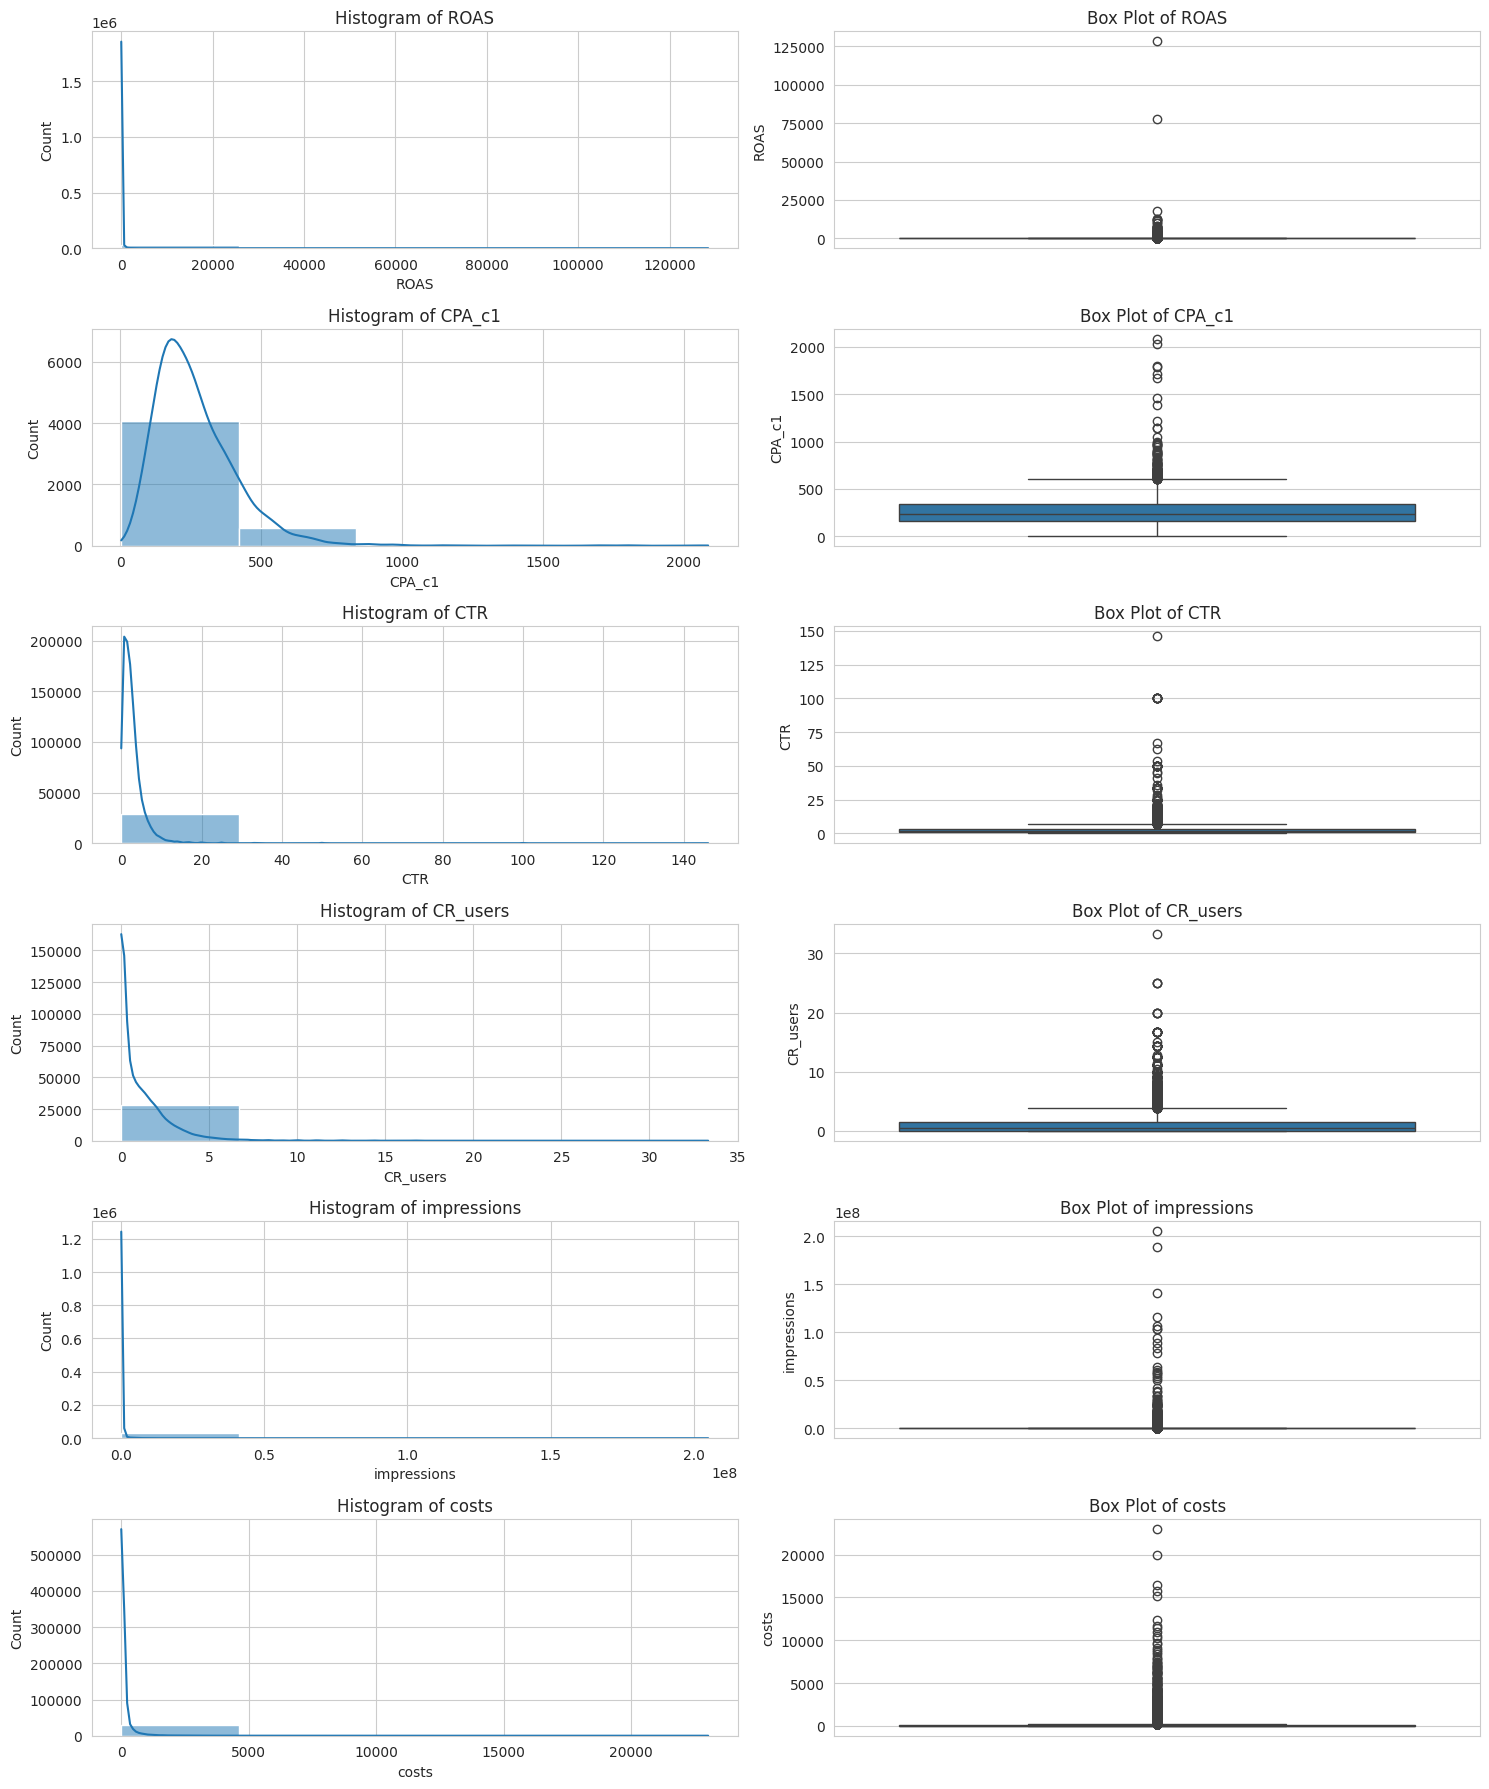


2. Порівняння каналів (Network Performance):


<ipython-input-14-238403225>:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='network', y='Agg_ROAS', data=network_performance.sort_values(by='Agg_ROAS', ascending=False), ax=axes[0], palette='viridis')
<ipython-input-14-238403225>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='network', y='Agg_CPA_c1', data=network_performance.sort_values(by='Agg_CPA_c1', ascending=True), ax=axes[1], palette='plasma')


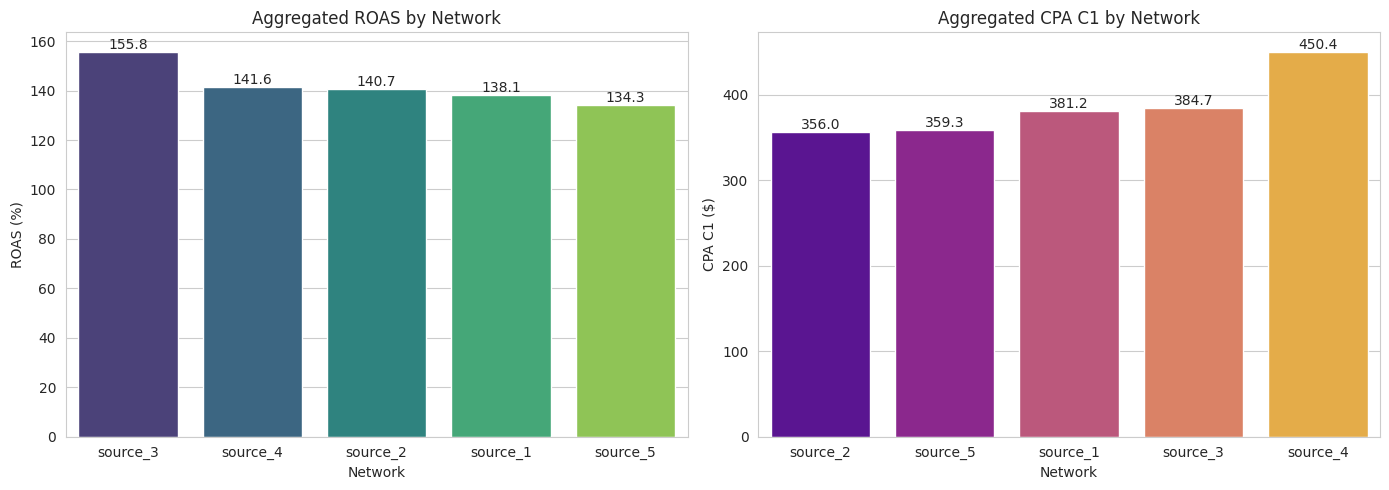


3. Привабливість креативів (CTR, CR_users) по сегментах:


<ipython-input-14-238403225>:107: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


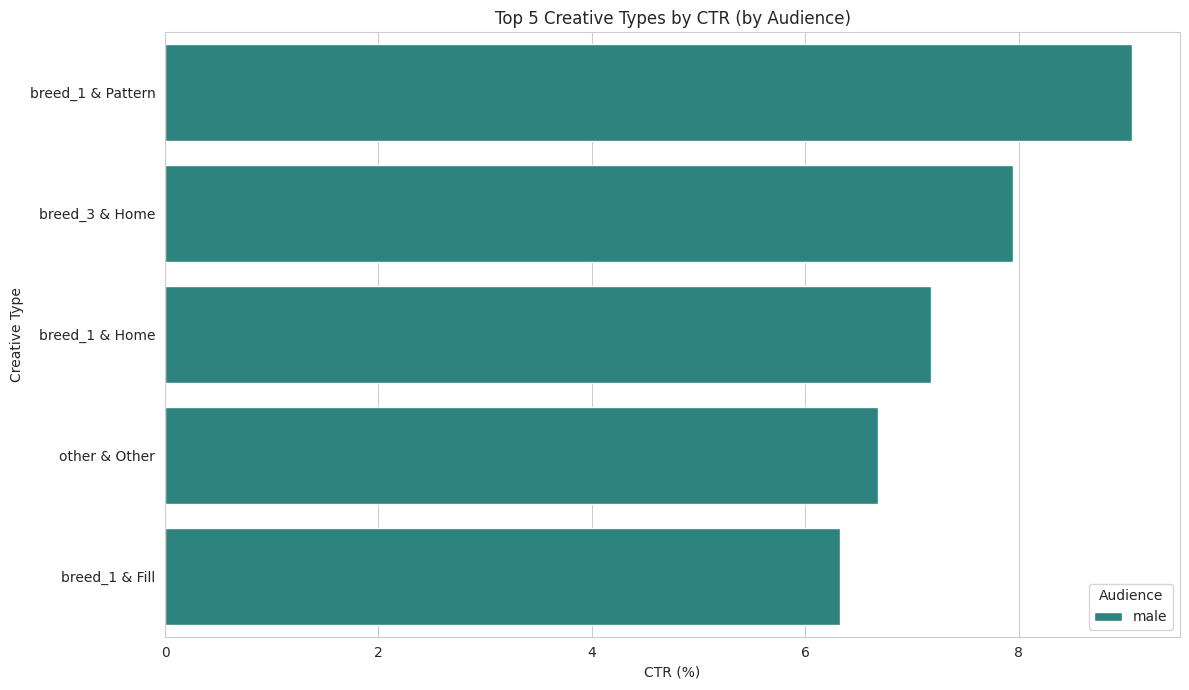

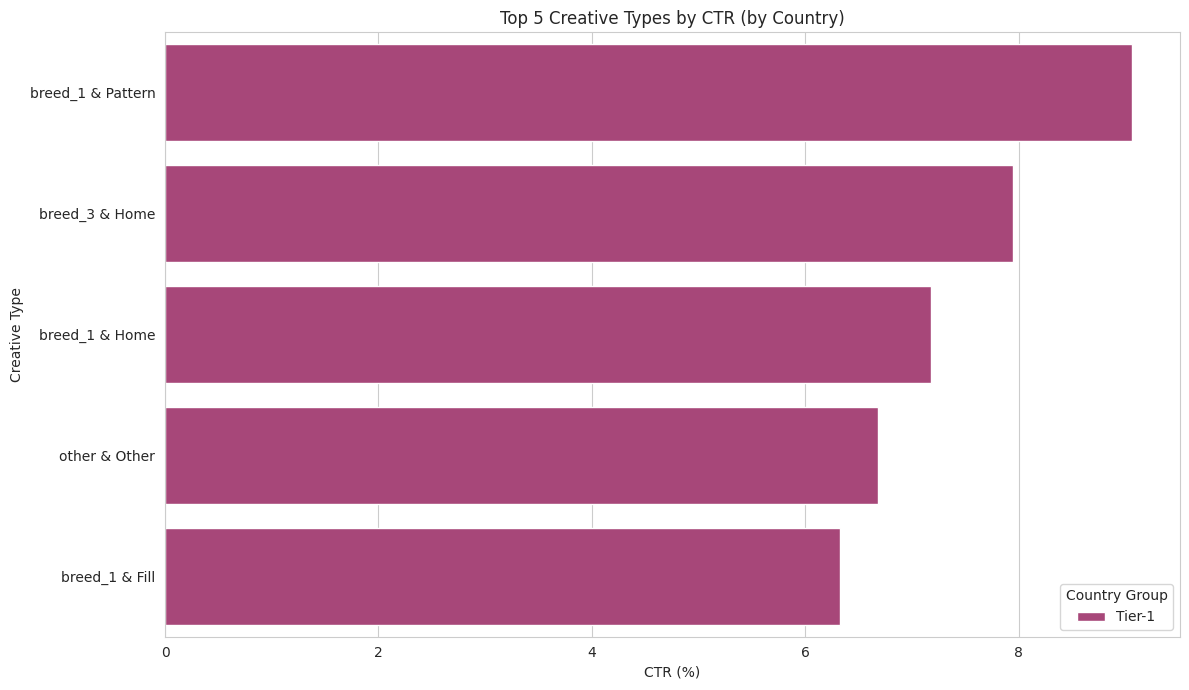

<ipython-input-14-238403225>:140: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


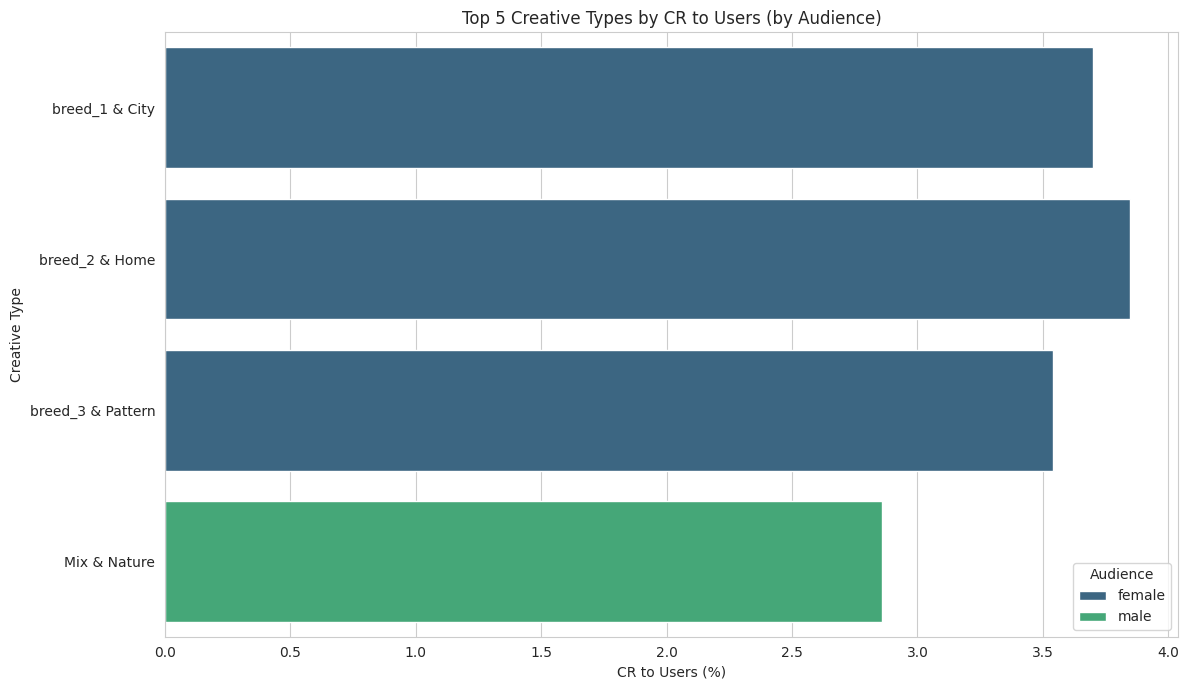

<ipython-input-14-238403225>:156: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


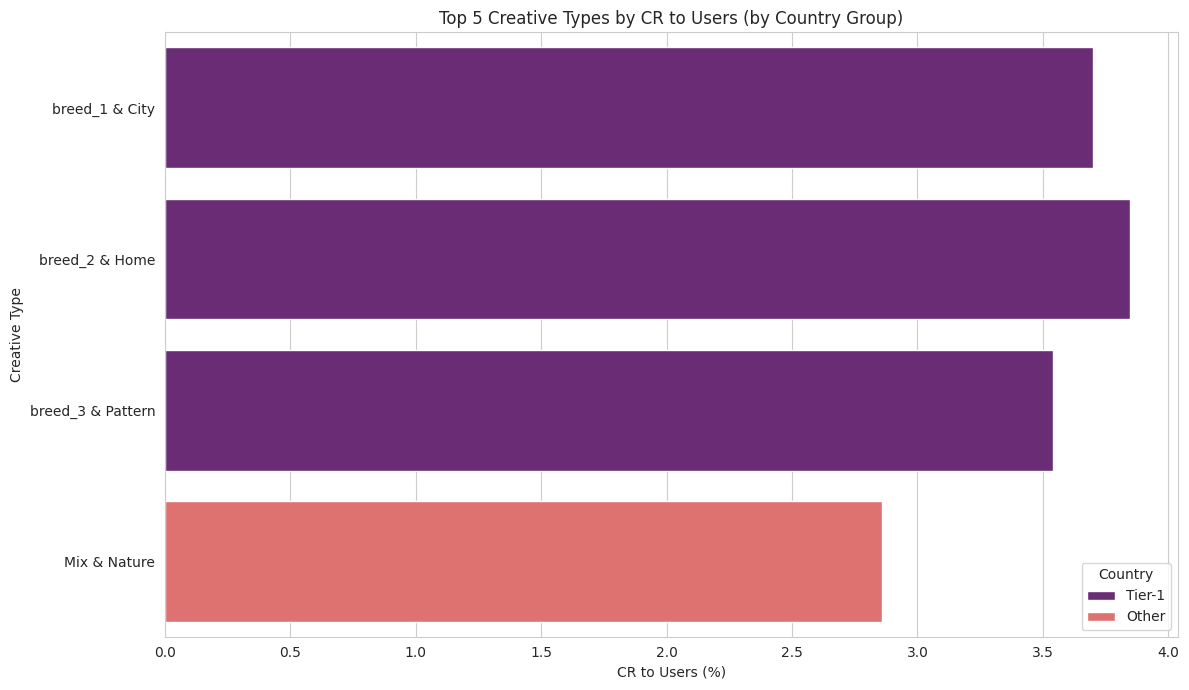


4. Теплова карта CTR за Creative Type та Network:


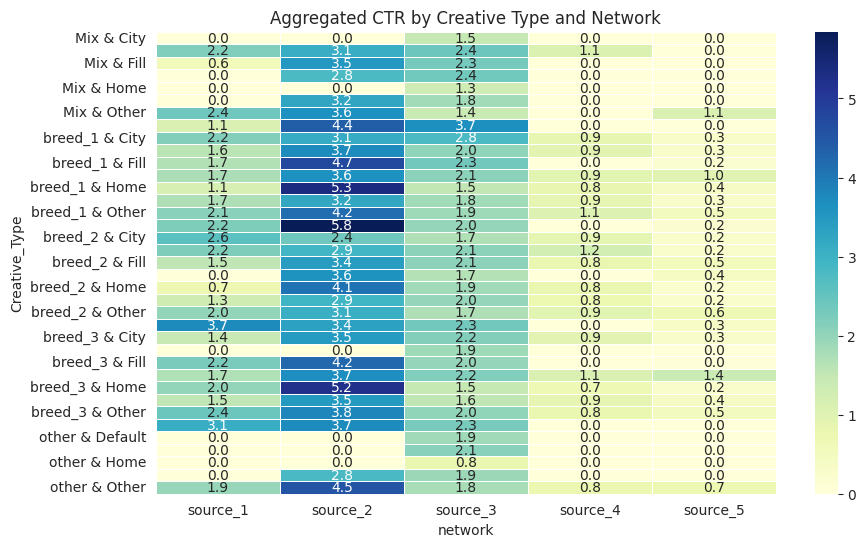


5. Теплова карта CR to Users за Creative Type та Network:


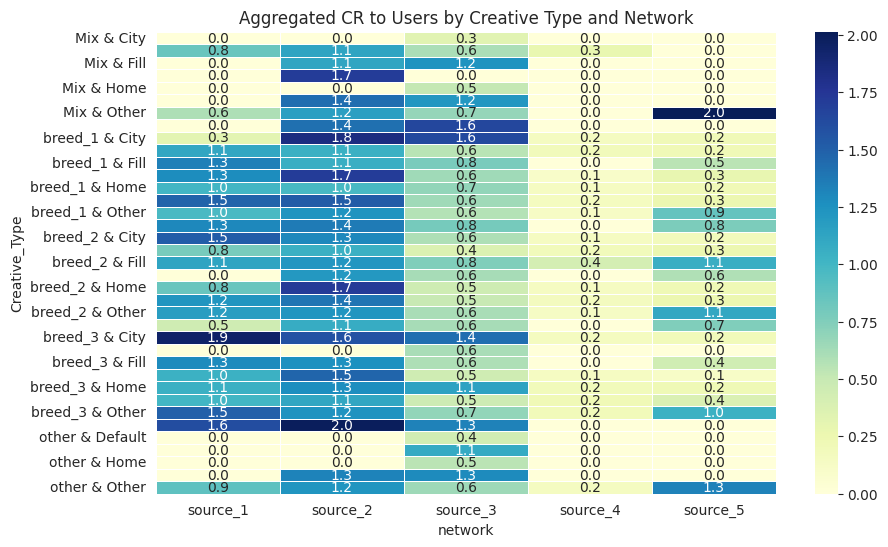


--- Аналіз привабливості креативів ---
Таблиця ефективності креативів за CTR та CR_users (відсортовано за CTR):
      network      Creative_Type audience country  Total_Impressions  Total_Clicks  Total_Users  Agg_CTR  Agg_CR_users
112  source_2  breed_1 & Pattern     male  Tier-1       4.645990e+05       42092.0          442     9.06          1.05
148  source_2     breed_3 & Home     male  Tier-1       3.923115e+05       31171.0          258     7.95          0.83
101  source_2     breed_1 & Home     male  Tier-1       1.299479e+06       93244.0          755     7.18          0.81
165  source_2      other & Other     male  Tier-1       3.664509e+06      244831.0         2077     6.68          0.85
95   source_2     breed_1 & Fill     male  Tier-1       2.938435e+06      185802.0         1980     6.32          1.07
91   source_2  breed_1 & Default     male  Tier-1       4.645723e+06      262795.0         2535     5.66          0.96
142  source_2     breed_3 & Fill     male  Tier-1     

In [14]:
# Агрегація за network (для порівняння каналів)
df_filled = df.fillna(0) # Заповнюємо NaN нулями для коректної агрегації
network_performance = df_filled.groupby('network').agg(
    Total_Spend=('costs', 'sum'),
    Total_Revenue=('revenue_7d', 'sum'),
    Total_Impressions=('impressions', 'sum'),
    Total_Clicks=('clicks', 'sum'),
    Total_Users=('users', 'sum'),
    Total_C1_Cnt=('c1_cnt', 'sum')
).reset_index()

network_performance['Agg_ROAS'] = (network_performance['Total_Revenue'] / network_performance['Total_Spend']) * 100
network_performance['Agg_CPA_c1'] = network_performance['Total_Spend'] / network_performance['Total_C1_Cnt']
network_performance['Agg_CTR'] = (network_performance['Total_Clicks'] / network_performance['Total_Impressions']) * 100
network_performance['Agg_CR_users'] = (network_performance['Total_Users'] / network_performance['Total_Clicks']) * 100
network_performance['Agg_CR_c1'] = (network_performance['Total_C1_Cnt'] / network_performance['Total_Users']) * 100
network_performance = network_performance.replace([np.inf, -np.inf], np.nan).fillna(0)


# Агрегація за network, breed, background, audience, country_group (для аналізу креативів)
grouping_cols_full = ['network', 'breed', 'background', 'audience', 'country']

agg_df = df_filled.groupby(grouping_cols_full).agg(
    Total_Spend=('costs', 'sum'),
    Total_Revenue=('revenue_7d', 'sum'),
    Total_Impressions=('impressions', 'sum'),
    Total_Clicks=('clicks', 'sum'),
    Total_Users=('users', 'sum'),
    Total_C1_Cnt=('c1_cnt', 'sum')
).reset_index()

agg_df['Agg_ROAS'] = (agg_df['Total_Revenue'] / agg_df['Total_Spend']) * 100
agg_df['Agg_CPA_c1'] = (agg_df['Total_Spend'] / agg_df['Total_C1_Cnt'])
agg_df['Agg_CTR'] = (agg_df['Total_Clicks'] / agg_df['Total_Impressions']) * 100
agg_df['Agg_CR_users'] = (agg_df['Total_Users'] / agg_df['Total_Clicks']) * 100
agg_df['Agg_CR_c1'] = (agg_df['Total_C1_Cnt'] / agg_df['Total_Users']) * 100

agg_df = agg_df.replace([np.inf, -np.inf], np.nan).fillna(0)


# --- 2. Візуалізації ---

# Налаштування стилю для графіків
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100 # Вища роздільна здатність для графіків
plt.rcParams['font.size'] = 10 # Розмір шрифту

print("--- Візуалізації ---")

# 2.1. Розподіл ключових метрик
print("\n1. Розподіл ключових метрик:")
metrics_to_plot_dist = ['ROAS', 'CPA_c1', 'CTR', 'CR_users', 'impressions', 'costs']
plt.figure(figsize=(15, len(metrics_to_plot_dist) * 3))
for i, metric in enumerate(metrics_to_plot_dist):
    plt.subplot(len(metrics_to_plot_dist), 2, 2*i + 1)
    sns.histplot(df[metric].dropna(), kde=True, bins=5) # bins=5 через малий датасет
    plt.title(f'Histogram of {metric}')

    plt.subplot(len(metrics_to_plot_dist), 2, 2*i + 2)
    sns.boxplot(y=df[metric].dropna())
    plt.title(f'Box Plot of {metric}')
plt.tight_layout()
plt.show()

# 2.2. Порівняння каналів (Network Performance)
print("\n2. Порівняння каналів (Network Performance):")
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.barplot(x='network', y='Agg_ROAS', data=network_performance.sort_values(by='Agg_ROAS', ascending=False), ax=axes[0], palette='viridis')
axes[0].set_title('Aggregated ROAS by Network')
axes[0].set_ylabel('ROAS (%)')
axes[0].set_xlabel('Network')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f')

sns.barplot(x='network', y='Agg_CPA_c1', data=network_performance.sort_values(by='Agg_CPA_c1', ascending=True), ax=axes[1], palette='plasma')
axes[1].set_title('Aggregated CPA C1 by Network')
axes[1].set_ylabel('CPA C1 ($)')
axes[1].set_xlabel('Network')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.1f')

plt.tight_layout()
plt.show()

# 2.3. Привабливість креативів (CTR, CR_users) по сегментах
print("\n3. Привабливість креативів (CTR, CR_users) по сегментах:")

# Створюємо комбіновану колонку для креативу
agg_df['Creative_Type'] = agg_df['breed'] + ' & ' + agg_df['background']

# Сортуємо дані за CTR та CR_users для кращого розуміння
agg_df_sorted_ctr = agg_df.sort_values(by='Agg_CTR', ascending=False)
agg_df_sorted_cr_users = agg_df.sort_values(by='Agg_CR_users', ascending=False)

# Візуалізація топ-5 креативів за CTR та CR_users в розрізі аудиторії та країн
top_n = 5 # Через малий датасет, топ-5 може бути лише кілька унікальних
min_impressions_for_chart = agg_df['Total_Impressions'].quantile(0.2) if not agg_df['Total_Impressions'].empty else 0 # Щоб не брати комбінації з 0 показами

# Фільтруємо для графіків, щоб Total_Impressions були > 0, бо CTR для 0 показів не має сенсу
agg_df_filtered = agg_df[agg_df['Total_Impressions'] > 0].copy()
if agg_df_filtered.empty:
    print("Недостатньо даних з позитивними показами для візуалізації привабливості креативів.")
else:
    # CTR візуалізація
    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=agg_df_filtered.nlargest(top_n, 'Agg_CTR'), # Top N за CTR
        x='Agg_CTR',
        y='Creative_Type',
        hue='audience',
        palette='viridis',
        ci=None # Вимикаємо довірчі інтервали для агрегованих даних
    )
    plt.title(f'Top {top_n} Creative Types by CTR (by Audience)')
    plt.xlabel('CTR (%)')
    plt.ylabel('Creative Type')
    plt.legend(title='Audience')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=agg_df_filtered.nlargest(top_n, 'Agg_CTR'), # Top N за CTR
        x='Agg_CTR',
        y='Creative_Type',
        hue='country',
        palette='magma',
        errorbar=None
    )
    plt.title(f'Top {top_n} Creative Types by CTR (by Country)')
    plt.xlabel('CTR (%)')
    plt.ylabel('Creative Type')
    plt.legend(title='Country Group')
    plt.tight_layout()
    plt.show()

    # CR_users візуалізація
    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=agg_df_filtered.nlargest(top_n, 'Agg_CR_users'), # Top N за CR_users
        x='Agg_CR_users',
        y='Creative_Type',
        hue='audience',
        palette='viridis',
        ci=None
    )
    plt.title(f'Top {top_n} Creative Types by CR to Users (by Audience)')
    plt.xlabel('CR to Users (%)')
    plt.ylabel('Creative Type')
    plt.legend(title='Audience')
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(12, 7))
    sns.barplot(
        data=agg_df_filtered.nlargest(top_n, 'Agg_CR_users'), # Top N за CR_users
        x='Agg_CR_users',
        y='Creative_Type',
        hue='country',
        palette='magma',
        ci=None
    )
    plt.title(f'Top {top_n} Creative Types by CR to Users (by Country Group)')
    plt.xlabel('CR to Users (%)')
    plt.ylabel('Creative Type')
    plt.legend(title='Country')
    plt.tight_layout()
    plt.show()

# Додатковий аналіз: Heatmap для CTR/CR_users за network, breed, background
# Обмеження через малу кількість унікальних комбінацій
if len(agg_df_filtered['Creative_Type'].unique()) > 1 and len(agg_df_filtered['network'].unique()) > 1:
    print("\n4. Теплова карта CTR за Creative Type та Network:")
    plt.figure(figsize=(10, 6))
    pivot_ctr = agg_df_filtered.pivot_table(index='Creative_Type', columns='network', values='Agg_CTR', fill_value=0)
    sns.heatmap(pivot_ctr, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
    plt.title('Aggregated CTR by Creative Type and Network')
    plt.show()

    print("\n5. Теплова карта CR to Users за Creative Type та Network:")
    plt.figure(figsize=(10, 6))
    pivot_cr_users = agg_df_filtered.pivot_table(index='Creative_Type', columns='network', values='Agg_CR_users', fill_value=0)
    sns.heatmap(pivot_cr_users, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)
    plt.title('Aggregated CR to Users by Creative Type and Network')
    plt.show()

print("\n--- Аналіз привабливості креативів ---")

# Оскільки датасет дуже малий, краще прямо вивести таблицю для інтерпретації
print("Таблиця ефективності креативів за CTR та CR_users (відсортовано за CTR):")
print(agg_df_filtered[[
    'network', 'Creative_Type', 'audience', 'country',
    'Total_Impressions', 'Total_Clicks', 'Total_Users',
    'Agg_CTR', 'Agg_CR_users'
]].sort_values(by='Agg_CTR', ascending=False).round(2).to_string())

# 2 Які з елементів креативів (порода та фон) мають найбільший вплив на перформанс користувачів?

In [15]:
# Аналіз впливу BREED
print("Вплив 'BREED' на метрики:")
breed_impact = df.groupby('breed').agg(
    Avg_CTR=('CTR', 'mean'),
    Avg_CR_c1=('CR_c1', 'mean'),
    Avg_CPA_c1=('CPA_c1', 'mean'),
    Avg_ROAS=('ROAS', 'mean'),
    Total_Costs=('costs', 'sum'), # Важливо дивитися на обсяг витрат
    Total_Revenue=('revenue_7d', 'sum')
).round(2)
print(breed_impact.sort_values(by='Avg_ROAS', ascending=False))

# Аналіз впливу BACKGROUND
print("\nВплив 'BACKGROUND' на метрики:")
background_impact = df.groupby('background').agg(
    Avg_CTR=('CTR', 'mean'),
    Avg_CR_c1=('CR_c1', 'mean'),
    Avg_CPA_c1=('CPA_c1', 'mean'),
    Avg_ROAS=('ROAS', 'mean'),
    Total_Costs=('costs', 'sum'),
    Total_Revenue=('revenue_7d', 'sum')
).round(2)
print(background_impact.sort_values(by='Avg_ROAS', ascending=False))

Вплив 'BREED' на метрики:
         Avg_CTR  Avg_CR_c1  Avg_CPA_c1  Avg_ROAS  Total_Costs  Total_Revenue
breed                                                                        
other       2.62       2.33         inf    103.83    579358.13       837286.0
breed_2     2.92       3.09         inf     81.02    745064.51      1061487.0
breed_1     2.65       2.31         inf     77.58   1607225.13      2324973.0
breed_3     2.87       2.30         inf     73.04    862755.59      1300112.2
Mix         3.56       3.13         inf     54.42    129076.06       160642.0

Вплив 'BACKGROUND' на метрики:
            Avg_CTR  Avg_CR_c1  Avg_CPA_c1  Avg_ROAS  Total_Costs  \
background                                                          
Home           2.17       2.12         inf     94.48    395287.87   
Other          2.79       2.47         inf     87.31   1482494.73   
City           1.54       2.19         inf     82.50    125958.42   
Fill           3.86       2.37         inf     78.3

In [16]:
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


# (Використовуємо той самий 'df' з розрахованими метриками, як і вище)
df_model = df.copy()

# Визначимо залежну змінну
target_metric = 'ROAS' # Можна спробувати також 'CPA_c1' (чим менше, тим краще, тому коефіцієнт буде інтерпретуватися інакше)

# Перевірте, що ці дії виконані
df['costs'] = df['costs'].replace(0, np.nan) # Щоб уникнути ділення на нуль, якщо витрати дійсно 0
df['ROAS'] = (df['revenue_7d'] / df['costs']) * 100

# Після ВСІХ розрахунків метрик, обробляємо NaN та Inf
df = df.replace([np.inf, -np.inf], np.nan) # Спочатку Inf в NaN
df = df.fillna(0) # Потім всі NaN в 0 (або інша стратегія)

# Якщо ви хочете виключити рядки з NaN у ROAS (якщо 0 ROAS не має сенсу)
df_model = df_model.dropna(subset=[target_metric])

# Визначимо ознаки (незалежні змінні)
# Обираємо змінні, які потенційно впливають на перформанс
features = ['breed', 'background', 'audience', 'country', 'network']

# Приклад заповнення NaN у категоріальних колонках перед One-Hot Encoding
for col in features:
    if df_model[col].isnull().any():
        # Заповнюємо NaN окремою категорією 'Missing'
        df_model[col] = df_model[col].fillna('Missing')
        # Або заповнюємо модою:
        # df_model[col] = df_model[col].fillna(df_model[col].mode()[0])

# КЛЮЧОВА ЗМІНА: drop='first' для уникнення пастки фіктивних змінних
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first'), features)
    ])

# Застосовуємо One-Hot Encoding
X_encoded_array = preprocessor.fit_transform(df_model[features])

# Отримуємо назви закодованих стовпців
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(features)
X_encoded = pd.DataFrame(X_encoded_array, columns=ohe_feature_names, index=df_model.index)

# Додаємо константу (intercept) для statsmodels
X_encoded = sm.add_constant(X_encoded)

# !!! Важливо: Обробка NaN у даних, які передаються в OLS
# Хоча ми заповнили NaN раніше, переконаємося, що в X_encoded або y_clean немає нових NaN.
# statsmodels за замовчуванням видаляє рядки з NaN (list-wise deletion).
# Для надійності, краще явно об'єднати X та y і видалити NaN
df_for_model = pd.concat([X_encoded, df_model[target_metric]], axis=1)

# Видаляємо рядки, які мають NaN в будь-якому з стовпців, що використовуються в моделі
df_for_model = df_for_model.dropna()

y_clean = df_for_model[target_metric]
X_clean = df_for_model.drop(columns=[target_metric])


# --- 3. Побудова та навчання моделі OLS ---
model = sm.OLS(y_clean, X_clean)
results = model.fit()

print(f"\n--- Результати регресійної моделі для залежної змінної: {target_metric} ---")
print(results.summary())

# --- 4. Інтерпретація результатів ---
print("\nІнтерпретація коефіцієнтів (сортовано за впливом, від найбільшого позитивного до найбільшого негативного):")
print(results.params.sort_values(ascending=False))

print("\nP-значення коефіцієнтів (тільки статистично значущі, p < 0.05):")
print(results.pvalues[results.pvalues < 0.05].sort_values())



--- Результати регресійної моделі для залежної змінної: ROAS ---
                            OLS Regression Results                            
Dep. Variable:                   ROAS   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.758
Date:                Sat, 14 Jun 2025   Prob (F-statistic):             0.0272
Time:                        08:59:26   Log-Likelihood:            -2.2120e+05
No. Observations:               26635   AIC:                         4.424e+05
Df Residuals:                   26617   BIC:                         4.426e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------

--- Візуалізації Впливу Елементів Креативу (Порода та Фон) ---

Вплив Породи (Breed) на перформанс:


<ipython-input-17-464205891>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='breed', y='Agg_ROAS', data=breed_performance.sort_values('Agg_ROAS', ascending=False), ax=axes[0, 0], palette='viridis')
<ipython-input-17-464205891>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='breed', y='Agg_CPA_c1', data=breed_performance.sort_values('Agg_CPA_c1', ascending=True), ax=axes[0, 1], palette='plasma')
<ipython-input-17-464205891>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='breed', y='Agg_CTR', data=breed_performance.sort_values('

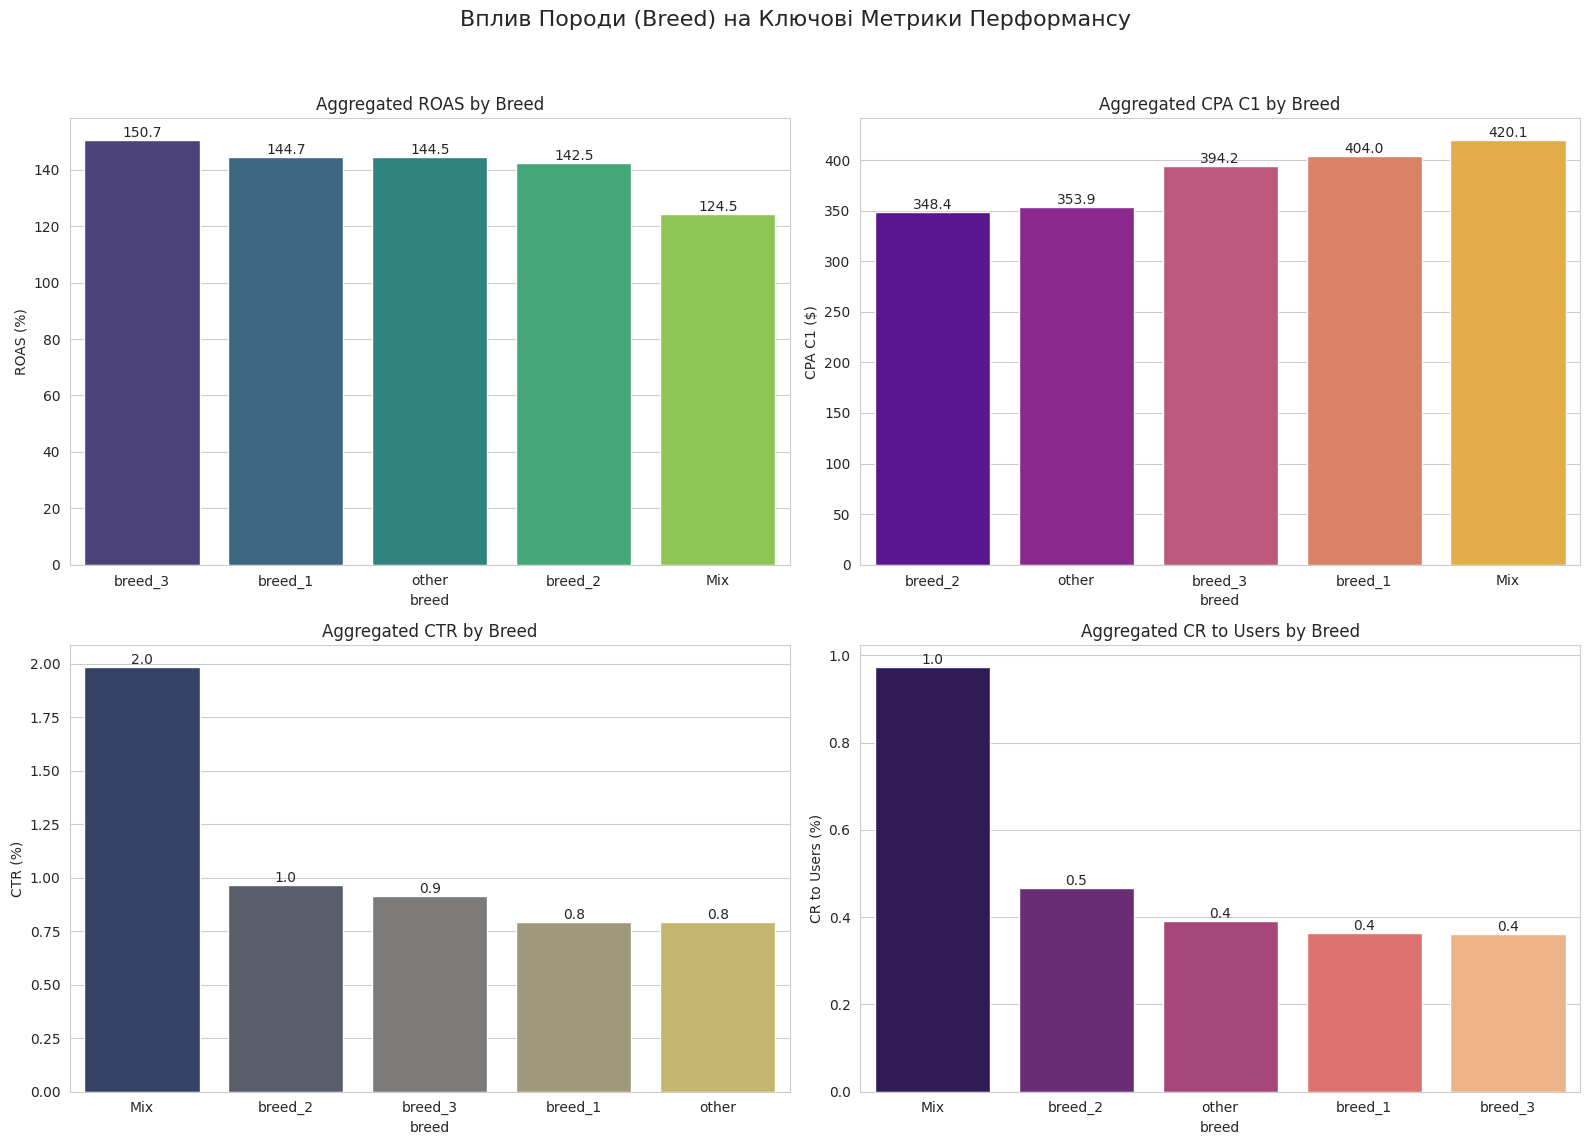


Вплив Фонового Зображення (Background) на перформанс:


<ipython-input-17-464205891>:85: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='background', y='Agg_ROAS', data=background_performance.sort_values('Agg_ROAS', ascending=False), ax=axes[0, 0], palette='viridis')
<ipython-input-17-464205891>:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='background', y='Agg_CPA_c1', data=background_performance.sort_values('Agg_CPA_c1', ascending=True), ax=axes[0, 1], palette='plasma')
<ipython-input-17-464205891>:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='background', y='Agg_CTR', data=backgr

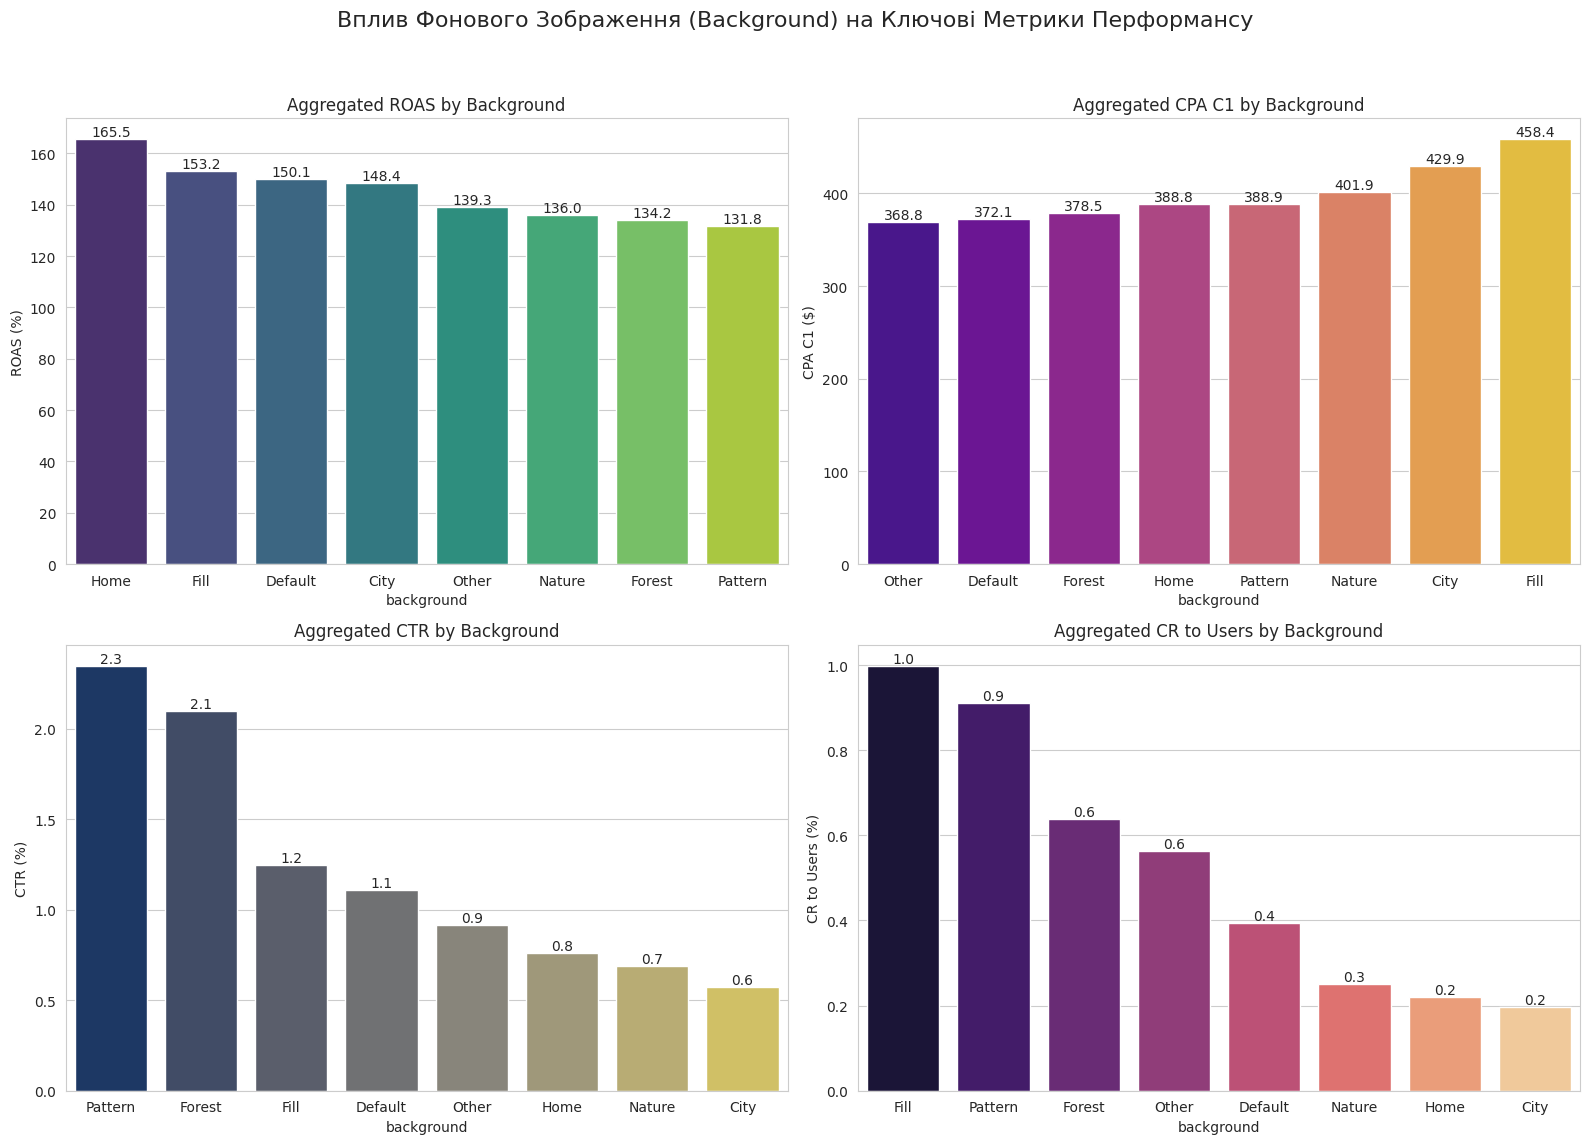

In [17]:
# Агрегація за Breed
breed_performance = df_filled.groupby('breed').agg(
    Total_Spend=('costs', 'sum'),
    Total_Revenue=('revenue_7d', 'sum'),
    Total_Impressions=('impressions', 'sum'),
    Total_Clicks=('clicks', 'sum'),
    Total_Users=('users', 'sum'),
    Total_C1_Cnt=('c1_cnt', 'sum')
).reset_index()

breed_performance['Agg_ROAS'] = (breed_performance['Total_Revenue'] / breed_performance['Total_Spend']) * 100
breed_performance['Agg_CPA_c1'] = (breed_performance['Total_Spend'] / breed_performance['Total_C1_Cnt'])
breed_performance['Agg_CTR'] = (breed_performance['Total_Clicks'] / breed_performance['Total_Impressions']) * 100
breed_performance['Agg_CR_users'] = (breed_performance['Total_Users'] / breed_performance['Total_Clicks']) * 100
breed_performance = breed_performance.replace([np.inf, -np.inf], np.nan).fillna(0)


# Агрегація за Background
background_performance = df_filled.groupby('background').agg(
    Total_Spend=('costs', 'sum'),
    Total_Revenue=('revenue_7d', 'sum'),
    Total_Impressions=('impressions', 'sum'),
    Total_Clicks=('clicks', 'sum'),
    Total_Users=('users', 'sum'),
    Total_C1_Cnt=('c1_cnt', 'sum')
).reset_index()

background_performance['Agg_ROAS'] = (background_performance['Total_Revenue'] / background_performance['Total_Spend']) * 100
background_performance['Agg_CPA_c1'] = (background_performance['Total_Spend'] / background_performance['Total_C1_Cnt'])
background_performance['Agg_CTR'] = (background_performance['Total_Clicks'] / background_performance['Total_Impressions']) * 100
background_performance['Agg_CR_users'] = (background_performance['Total_Users'] / background_performance['Total_Clicks']) * 100
background_performance = background_performance.replace([np.inf, -np.inf], np.nan).fillna(0)


# --- 3. Візуалізація Впливу Breed та Background ---

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

print("--- Візуалізації Впливу Елементів Креативу (Порода та Фон) ---")

# 3.1. Вплив Breed (Породи)
print("\nВплив Породи (Breed) на перформанс:")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Вплив Породи (Breed) на Ключові Метрики Перформансу', fontsize=16)

# ROAS
sns.barplot(x='breed', y='Agg_ROAS', data=breed_performance.sort_values('Agg_ROAS', ascending=False), ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Aggregated ROAS by Breed')
axes[0, 0].set_ylabel('ROAS (%)')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%.1f')

# CPA_c1
sns.barplot(x='breed', y='Agg_CPA_c1', data=breed_performance.sort_values('Agg_CPA_c1', ascending=True), ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Aggregated CPA C1 by Breed')
axes[0, 1].set_ylabel('CPA C1 ($)')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.1f')

# CTR
sns.barplot(x='breed', y='Agg_CTR', data=breed_performance.sort_values('Agg_CTR', ascending=False), ax=axes[1, 0], palette='cividis')
axes[1, 0].set_title('Aggregated CTR by Breed')
axes[1, 0].set_ylabel('CTR (%)')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%.1f')

# CR_users
sns.barplot(x='breed', y='Agg_CR_users', data=breed_performance.sort_values('Agg_CR_users', ascending=False), ax=axes[1, 1], palette='magma')
axes[1, 1].set_title('Aggregated CR to Users by Breed')
axes[1, 1].set_ylabel('CR to Users (%)')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%.1f')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Регулюємо відступ, щоб заголовок не накладався
plt.show()

# 3.2. Вплив Background (Фону)
print("\nВплив Фонового Зображення (Background) на перформанс:")
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Вплив Фонового Зображення (Background) на Ключові Метрики Перформансу', fontsize=16)

# ROAS
sns.barplot(x='background', y='Agg_ROAS', data=background_performance.sort_values('Agg_ROAS', ascending=False), ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Aggregated ROAS by Background')
axes[0, 0].set_ylabel('ROAS (%)')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fmt='%.1f')

# CPA_c1
sns.barplot(x='background', y='Agg_CPA_c1', data=background_performance.sort_values('Agg_CPA_c1', ascending=True), ax=axes[0, 1], palette='plasma')
axes[0, 1].set_title('Aggregated CPA C1 by Background')
axes[0, 1].set_ylabel('CPA C1 ($)')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fmt='%.1f')

# CTR
sns.barplot(x='background', y='Agg_CTR', data=background_performance.sort_values('Agg_CTR', ascending=False), ax=axes[1, 0], palette='cividis')
axes[1, 0].set_title('Aggregated CTR by Background')
axes[1, 0].set_ylabel('CTR (%)')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fmt='%.1f')

# CR_users
sns.barplot(x='background', y='Agg_CR_users', data=background_performance.sort_values('Agg_CR_users', ascending=False), ax=axes[1, 1], palette='magma')
axes[1, 1].set_title('Aggregated CR to Users by Background')
axes[1, 1].set_ylabel('CR to Users (%)')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fmt='%.1f')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



<ipython-input-18-1489267274>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='breed', y='Agg_ROAS', data=breed_performance.sort_values('Agg_ROAS', ascending=False), ax=axes[0], palette='viridis')
<ipython-input-18-1489267274>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='breed', y='Agg_CTR', data=breed_performance.sort_values('Agg_CTR', ascending=False), ax=axes[1], palette='plasma')


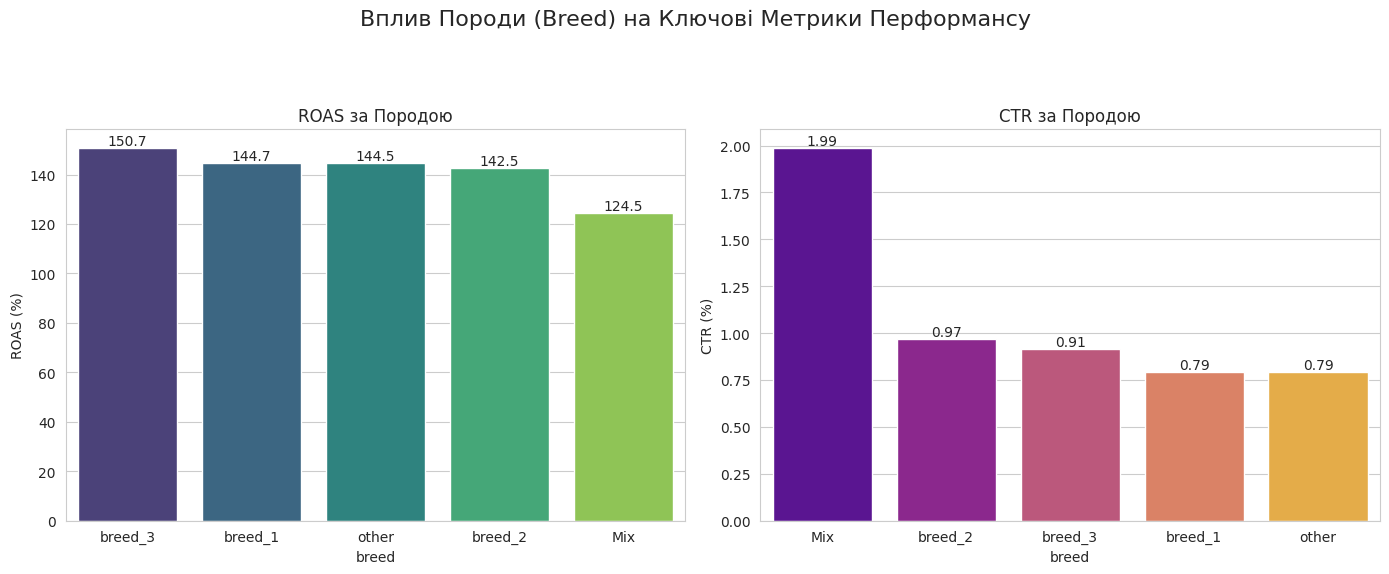

<ipython-input-18-1489267274>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='background', y='Agg_ROAS', data=background_performance.sort_values('Agg_ROAS', ascending=False), ax=axes[0], palette='viridis')
<ipython-input-18-1489267274>:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='background', y='Agg_CTR', data=background_performance.sort_values('Agg_CTR', ascending=False), ax=axes[1], palette='plasma')


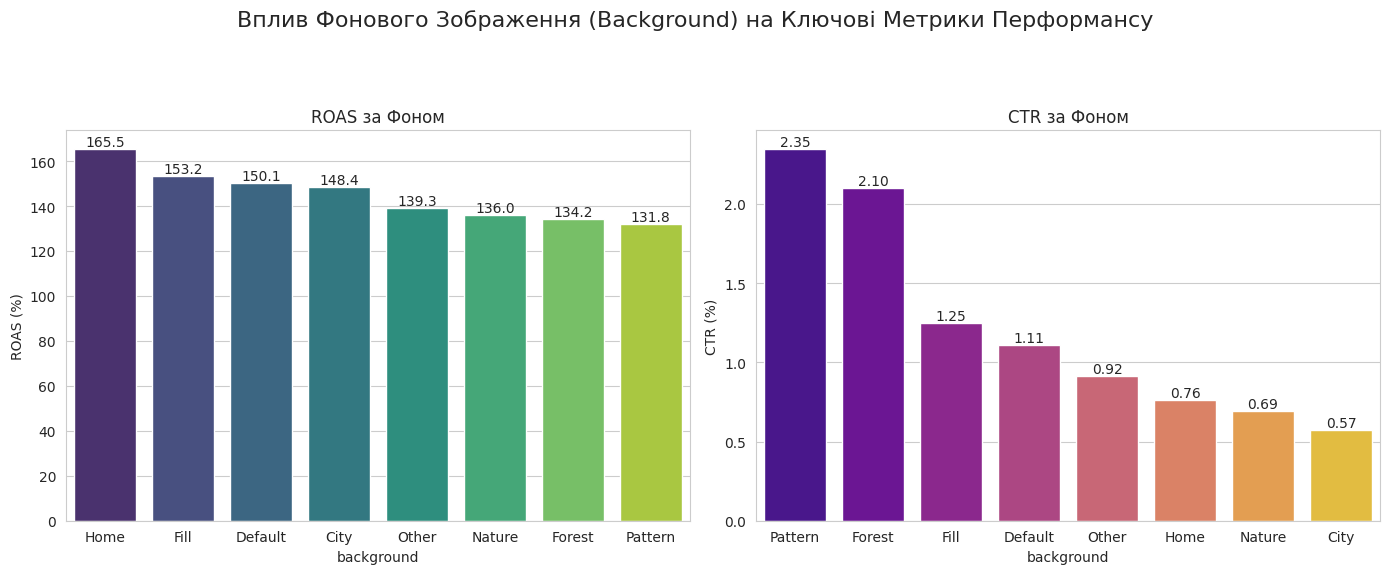

In [18]:
df_processed = df.replace([np.inf, -np.inf], np.nan).fillna(0)

# Агрегація за Breed
breed_performance = df_processed.groupby('breed').agg(
    Total_Spend=('costs', 'sum'),
    Total_Revenue=('revenue_7d', 'sum'),
    Total_Impressions=('impressions', 'sum'),
    Total_Clicks=('clicks', 'sum'),
).reset_index()

breed_performance['Agg_ROAS'] = (breed_performance['Total_Revenue'] / breed_performance['Total_Spend']) * 100
breed_performance['Agg_CTR'] = (breed_performance['Total_Clicks'] / breed_performance['Total_Impressions']) * 100
breed_performance = breed_performance.replace([np.inf, -np.inf], np.nan).fillna(0)


# Агрегація за Background
background_performance = df_processed.groupby('background').agg(
    Total_Spend=('costs', 'sum'),
    Total_Revenue=('revenue_7d', 'sum'),
    Total_Impressions=('impressions', 'sum'),
    Total_Clicks=('clicks', 'sum'),
).reset_index()

background_performance['Agg_ROAS'] = (background_performance['Total_Revenue'] / background_performance['Total_Spend']) * 100
background_performance['Agg_CTR'] = (background_performance['Total_Clicks'] / background_performance['Total_Impressions']) * 100
background_performance = background_performance.replace([np.inf, -np.inf], np.nan).fillna(0)


# --- 3. Візуалізації ---

sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

# --- Графіки для Breed ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Вплив Породи (Breed) на Ключові Метрики Перформансу', fontsize=16)

# ROAS by Breed
sns.barplot(x='breed', y='Agg_ROAS', data=breed_performance.sort_values('Agg_ROAS', ascending=False), ax=axes[0], palette='viridis')
axes[0].set_title('ROAS за Породою')
axes[0].set_ylabel('ROAS (%)')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f')

# CTR by Breed
sns.barplot(x='breed', y='Agg_CTR', data=breed_performance.sort_values('Agg_CTR', ascending=False), ax=axes[1], palette='plasma')
axes[1].set_title('CTR за Породою')
axes[1].set_ylabel('CTR (%)')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()



# --- Графіки для Background ---
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
fig.suptitle('Вплив Фонового Зображення (Background) на Ключові Метрики Перформансу', fontsize=16)

# ROAS by Background
sns.barplot(x='background', y='Agg_ROAS', data=background_performance.sort_values('Agg_ROAS', ascending=False), ax=axes[0], palette='viridis')
axes[0].set_title('ROAS за Фоном')
axes[0].set_ylabel('ROAS (%)')
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f')

# CTR by Background
sns.barplot(x='background', y='Agg_CTR', data=background_performance.sort_values('Agg_CTR', ascending=False), ax=axes[1], palette='plasma')
axes[1].set_title('CTR за Фоном')
axes[1].set_ylabel('CTR (%)')
for container in axes[1].containers:
    axes[1].bar_label(container, fmt='%.2f')

plt.tight_layout(rect=[0, 0.03, 1, 0.9])
plt.show()

# 3 Чи є типи креативів, котрі некоректно формують очікування від продукту?

In [19]:
# --- Аналіз для виявлення креативів, що некоректно формують очікування ---

print("\n--- Типи креативів, що приваблюють, але погано конвертують (високий CTR, низький CR_users) ---")
# Шукаємо креативи з CTR вище середнього, але CR_users нижче середнього
avg_ctr = agg_df['Agg_CTR'].mean()
avg_cr_users = agg_df['Agg_CR_users'].mean()

# Фільтруємо ті, що мають високий CTR, але низький CR_users
misleading_creatives_1 = agg_df[
    (agg_df['Agg_CTR'] > avg_ctr) &
    (agg_df['Agg_CR_users'] < avg_cr_users)
].sort_values(by=['Agg_CTR', 'Agg_CR_users'], ascending=[False, True]) # Сортуємо за CTR спаданням, CR_users зростанням

if not misleading_creatives_1.empty:
    display(misleading_creatives_1[['breed', 'background', 'audience', 'country', 'Agg_CTR', 'Agg_CR_users', 'Agg_CR_c1', 'Agg_ROAS']].round(2))
else:
    print("Не знайдено креативів з патерном 'високий CTR, низький CR_users' на основі середніх значень.")


print("\n--- Типи креативів, що реєструють, але погано приносять покупки (високий CR_users, низький CR_c1) ---")
# Шукаємо креативи з CR_users вище середнього, але CR_c1 нижче середнього
avg_cr_users = agg_df['Agg_CR_users'].mean()
avg_cr_c1 = agg_df['Agg_CR_c1'].mean()

misleading_creatives_2 = agg_df[
    (agg_df['Agg_CR_users'] > avg_cr_users) &
    (agg_df['Agg_CR_c1'] < avg_cr_c1)
].sort_values(by=['Agg_CR_users', 'Agg_CR_c1'], ascending=[False, True]) # Сортуємо за CR_users спаданням, CR_c1 зростанням

if not misleading_creatives_2.empty:
    display(misleading_creatives_2[['breed', 'background', 'audience', 'country', 'Agg_CTR', 'Agg_CR_users', 'Agg_CR_c1', 'Agg_ROAS']].round(2))
else:
    print("Не знайдено креативів з патерном 'високий CR_users, низький CR_c1' на основі середніх значень.")


print("\n--- Типи креативів з прийнятним залученням, але поганим ROAS/CPA_c1 ---")
# Шукаємо креативи з прийнятним CTR/CR_users (наприклад, вище певного порогу),
# але з ROAS нижче середнього АБО CPA_c1 вище середнього.
avg_roas = agg_df['Agg_ROAS'].mean()
avg_cpa_c1 = agg_df['Agg_CPA_c1'].mean()

misleading_creatives_3 = agg_df[
    (agg_df['Agg_CTR'] > avg_ctr) & # Або інший поріг
    (agg_df['Agg_CR_users'] > avg_cr_users) & # Або інший поріг
    ((agg_df['Agg_ROAS'] < avg_roas) | (agg_df['Agg_CPA_c1'] > avg_cpa_c1)) # АБО ROAS низький, АБО CPA високий
].sort_values(by=['Agg_ROAS', 'Agg_CPA_c1'], ascending=[True, False]) # Сортуємо за ROAS зростанням, CPA_c1 спаданням

if not misleading_creatives_3.empty:
    display(misleading_creatives_3[['breed', 'background', 'audience', 'country', 'Agg_CTR', 'Agg_CR_users', 'Agg_CR_c1', 'Agg_ROAS', 'Agg_CPA_c1']].round(2))
else:
    print("Не знайдено креативів з патерном 'прийнятне залучення, але поганий ROAS/CPA_c1' на основі середніх значень.")


--- Типи креативів, що приваблюють, але погано конвертують (високий CTR, низький CR_users) ---


,breed,background,audience,country,Agg_CTR,Agg_CR_users,Agg_CR_c1,Agg_ROAS
100,breed_1,Home,male,Other,5.03,0.59,3.35,198.82
154,breed_3,Other,male,Other,4.95,0.75,4.08,196.89
126,breed_2,Home,male,Other,4.68,0.45,3.02,102.21
108,breed_1,Other,male,Other,4.66,0.68,4.46,194.45
123,breed_2,Forest,male,Other,4.41,0.36,3.21,116.50
...,...,...,...,...,...,...,...,...
5,Mix,Other,male,Tier-1,1.95,0.00,0.00,0.00
114,breed_2,City,male,Other,1.94,0.54,3.70,81.17
232,breed_2,Home,female,Other,1.92,0.00,0.00,0.00
65,Mix,Default,female,Other,1.91,0.00,0.00,0.00



--- Типи креативів, що реєструють, але погано приносять покупки (високий CR_users, низький CR_c1) ---


,breed,background,audience,country,Agg_CTR,Agg_CR_users,Agg_CR_c1,Agg_ROAS
189,breed_1,City,female,Tier-1,3.23,4.32,0.00,17.88
125,breed_2,Home,female,Tier-1,3.04,3.85,0.00,0.00
181,Mix,Nature,male,Other,2.95,2.86,0.00,0.00
245,breed_3,City,female,Tier-1,2.57,2.36,0.00,38.63
387,breed_3,Other,female,Tier-1,0.90,2.30,2.13,124.13
...,...,...,...,...,...,...,...,...
148,breed_3,Home,male,Tier-1,7.95,0.83,2.03,96.89
64,other,Other,male,Tier-1,1.57,0.82,3.06,87.14
101,breed_1,Home,male,Tier-1,7.18,0.81,3.58,103.83
132,breed_2,Other,male,Other,2.84,0.80,3.46,146.85



--- Типи креативів з прийнятним залученням, але поганим ROAS/CPA_c1 ---


,breed,background,audience,country,Agg_CTR,Agg_CR_users,Agg_CR_c1,Agg_ROAS,Agg_CPA_c1
14,breed_1,Forest,female,Tier-1,2.24,1.23,0.00,0.00,0.00
28,breed_2,City,male,Tier-1,3.23,1.61,0.00,0.00,0.00
69,Mix,Fill,female,Other,2.22,1.16,0.00,0.00,0.00
125,breed_2,Home,female,Tier-1,3.04,3.85,0.00,0.00,0.00
172,Mix,Fill,female,Tier-1,2.53,2.08,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
199,breed_1,Fill,male,Tier-1,2.35,1.41,4.16,188.18,471.66
70,Mix,Fill,female,Tier-1,3.67,1.43,8.60,214.95,442.99
83,Mix,Pattern,female,Tier-1,3.78,1.93,8.66,216.06,463.38
137,breed_3,City,female,Tier-1,2.00,2.44,11.54,297.01,326.59


# 4 Як варто розподілити бюджети в розрізі джерел залучення?

In [20]:
# Агрегація за network
network_performance = df.groupby('network').agg(
    Total_Spend=('costs', 'sum'),
    Total_Revenue=('revenue_7d', 'sum'),
    Total_C1_Cnt=('c1_cnt', 'sum')
).reset_index()

# Розрахунок ключових метрик після агрегації
network_performance['Agg_ROAS'] = (network_performance['Total_Revenue'] / network_performance['Total_Spend']) * 100
network_performance['Agg_CPA_c1'] = network_performance['Total_Spend'] / network_performance['Total_C1_Cnt']

# Обробка можливих Inf або NaN, які можуть з'явитися в Agg_ROAS / Agg_CPA_c1,
# якщо Total_Spend або Total_C1_Cnt були 0 для певного каналу.
network_performance = network_performance.replace([np.inf, -np.inf], np.nan).fillna(0)


print("Зведена ефективність за джерелом залучення (Network):")
print(network_performance.round(2))

# Сортування для прийняття рішення
print("\n--- Рейтинг джерел залучення за ROAS (від найвищого до найнижчого) ---")
print(network_performance.sort_values(by='Agg_ROAS', ascending=False).round(2))

print("\n--- Рейтинг джерел залучення за CPA C1 (від найнижчого до найвищого) ---")
print(network_performance.sort_values(by='Agg_CPA_c1', ascending=True).round(2))

Зведена ефективність за джерелом залучення (Network):
    network  Total_Spend  Total_Revenue  Total_C1_Cnt  Agg_ROAS  Agg_CPA_c1
0  source_1    233667.10       322605.0        613.00    138.06      381.19
1  source_2   1144429.01      1609929.0       3215.00    140.68      355.97
2  source_3   1297017.30      2020344.2       3371.25    155.77      384.73
3  source_4    754000.77      1067797.0       1674.00    141.62      450.42
4  source_5    494365.24       663825.0       1376.00    134.28      359.28

--- Рейтинг джерел залучення за ROAS (від найвищого до найнижчого) ---
    network  Total_Spend  Total_Revenue  Total_C1_Cnt  Agg_ROAS  Agg_CPA_c1
2  source_3   1297017.30      2020344.2       3371.25    155.77      384.73
3  source_4    754000.77      1067797.0       1674.00    141.62      450.42
1  source_2   1144429.01      1609929.0       3215.00    140.68      355.97
0  source_1    233667.10       322605.0        613.00    138.06      381.19
4  source_5    494365.24       663825.

# 5 Як варто розподіляти бюджети всередині каналів по типам креативів?

In [21]:
# --- 2. Групування за (network, breed, background, audience, country_group) ---
# Це групування дозволить нам аналізувати креативи всередині каналів
grouping_cols_full = ['network', 'breed', 'background', 'audience', 'country']

agg_df = df.groupby(grouping_cols_full).agg(
    Total_Spend=('costs', 'sum'),
    Total_Revenue=('revenue_7d', 'sum'),
    Total_Impressions=('impressions', 'sum'),
    Total_Clicks=('clicks', 'sum'),
    Total_Users=('users', 'sum'),
    Total_C1_Cnt=('c1_cnt', 'sum')
).reset_index()

# Перерахунок агрегованих метрик
agg_df['Agg_ROAS'] = (agg_df['Total_Revenue'] / agg_df['Total_Spend']) * 100
agg_df['Agg_CPA_c1'] = agg_df['Total_Spend'] / agg_df['Total_C1_Cnt']
agg_df['Agg_CTR'] = (agg_df['Total_Clicks'] / agg_df['Total_Impressions']) * 100
agg_df['Agg_CR_users'] = (agg_df['Total_Users'] / agg_df['Total_Clicks']) * 100
agg_df['Agg_CR_c1'] = (agg_df['Total_C1_Cnt'] / agg_df['Total_Users']) * 100

# Замінити inf та NaN на 0, які могли виникнути при перерахунку агрегованих метрик
agg_df = agg_df.replace([np.inf, -np.inf], np.nan)
agg_df = agg_df.fillna(0)

print("Агреговані метрики за Network, Breed, Background, Audience, Country:")
display(agg_df.round(2))
print("-" * 50)

# --- 3. Розподіл бюджету всередині кожного каналу ---

# Отримаємо унікальні назви мереж
networks = agg_df['network'].unique()

for network in networks:
    print(f"\n--- Аналіз для каналу: {network} ---")

    # Фільтруємо дані для поточної мережі
    network_data = agg_df[agg_df['network'] == network].copy()

    # Сортуємо креативи за ROAS (спадання) та CPA_c1 (зростання)
    network_data_sorted = network_data.sort_values(by=['Agg_ROAS', 'Agg_CPA_c1'], ascending=[False, True])

    # Виводимо найефективніші та найменш ефективні типи креативів для цього каналу
    print("\nНайефективніші типи креативів (топ-3 за ROAS) в розрізі Audience та Country_group:")
    display(network_data_sorted.head(3)[[
        'breed', 'background', 'audience', 'country',
        'Total_Spend', 'Total_Revenue', 'Agg_ROAS', 'Agg_CPA_c1', 'Agg_CTR'
    ]].round(2))

    print("\nНайменш ефективні типи креативів (останні 3 за ROAS, якщо їх витрати > 0) в розрізі Audience та Country_group:")
    # Фільтруємо ті, що мають витрати, щоб уникнути виводу креативів, які не працювали взагалі
    ineffective_creatives = network_data_sorted[network_data_sorted['Total_Spend'] > 0].tail(3)
    if not ineffective_creatives.empty:
        display(ineffective_creatives[[
            'breed', 'background', 'audience', 'country',
            'Total_Spend', 'Total_Revenue', 'Agg_ROAS', 'Agg_CPA_c1', 'Agg_CTR'
        ]].round(2))
    else:
        print("Немає неефективних креативів з витратами.")

    print("-" * 30)

Агреговані метрики за Network, Breed, Background, Audience, Country:


,network,breed,background,audience,country,Total_Spend,Total_Revenue,Total_Impressions,Total_Clicks,Total_Users,Total_C1_Cnt,Agg_ROAS,Agg_CPA_c1,Agg_CTR,Agg_CR_users,Agg_CR_c1
0,source_1,Mix,Default,female,Tier-1,1786.99,1741.0,523413.0,12806.0,159,6.0,97.43,297.83,2.45,1.24,3.77
1,source_1,Mix,Default,male,Tier-1,132.02,11.0,22905.0,437.0,2,0.0,8.33,0.00,1.91,0.46,0.00
2,source_1,Mix,Fill,female,Tier-1,4.57,5.0,12002.0,68.0,0,0.0,109.41,0.00,0.57,0.00,0.00
3,source_1,Mix,Nature,male,Tier-1,0.00,0.0,0.0,0.0,0,0.0,0.00,0.00,0.00,0.00,0.00
4,source_1,Mix,Other,female,Tier-1,4480.29,6587.0,1137960.0,32130.0,384,11.0,147.02,407.30,2.82,1.20,2.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,source_5,other,Fill,male,Tier-1,0.00,0.0,0.0,0.0,0,0.0,0.00,0.00,0.00,0.00,0.00
392,source_5,other,Other,female,Other,769.40,492.0,956479.0,8555.0,187,6.0,63.95,128.23,0.89,2.19,3.21
393,source_5,other,Other,female,Tier-1,82900.26,112763.0,18230970.0,223016.0,6017,405.0,136.02,204.69,1.22,2.70,6.73
394,source_5,other,Other,male,Other,1657.49,1419.0,42466200.0,139930.0,192,6.0,85.61,276.25,0.33,0.14,3.12


--------------------------------------------------

--- Аналіз для каналу: source_1 ---

Найефективніші типи креативів (топ-3 за ROAS) в розрізі Audience та Country_group:


,breed,background,audience,country,Total_Spend,Total_Revenue,Agg_ROAS,Agg_CPA_c1,Agg_CTR
36,breed_2,Home,female,Tier-1,181.92,1013.0,556.84,0.00,0.61
15,breed_1,Forest,male,Tier-1,27.02,106.0,392.30,0.00,1.23
62,other,Other,female,Tier-1,51921.16,112497.0,216.67,303.63,2.33



Найменш ефективні типи креативів (останні 3 за ROAS, якщо їх витрати > 0) в розрізі Audience та Country_group:


,breed,background,audience,country,Total_Spend,Total_Revenue,Agg_ROAS,Agg_CPA_c1,Agg_CTR
14,breed_1,Forest,female,Tier-1,10.80,0.0,0.0,0.0,2.24
28,breed_2,City,male,Tier-1,76.63,0.0,0.0,0.0,3.23
49,breed_3,Forest,male,Tier-1,1.94,0.0,0.0,0.0,1.44


------------------------------

--- Аналіз для каналу: source_2 ---

Найефективніші типи креативів (топ-3 за ROAS) в розрізі Audience та Country_group:


,breed,background,audience,country,Total_Spend,Total_Revenue,Agg_ROAS,Agg_CPA_c1,Agg_CTR
92,breed_1,Fill,female,Other,108.95,401.0,368.06,108.95,5.08
137,breed_3,City,female,Tier-1,979.77,2910.0,297.01,326.59,2.00
144,breed_3,Forest,male,Other,2171.08,5800.0,267.15,197.37,3.26



Найменш ефективні типи креативів (останні 3 за ROAS, якщо їх витрати > 0) в розрізі Audience та Country_group:


,breed,background,audience,country,Total_Spend,Total_Revenue,Agg_ROAS,Agg_CPA_c1,Agg_CTR
69,Mix,Fill,female,Other,49.61,0.0,0.0,0.0,2.22
102,breed_1,Nature,female,Other,52.70,0.0,0.0,0.0,1.49
125,breed_2,Home,female,Tier-1,28.14,0.0,0.0,0.0,3.04


------------------------------

--- Аналіз для каналу: source_3 ---

Найефективніші типи креативів (топ-3 за ROAS) в розрізі Audience та Country_group:


,breed,background,audience,country,Total_Spend,Total_Revenue,Agg_ROAS,Agg_CPA_c1,Agg_CTR
247,breed_3,City,male,Tier-1,5867.79,23324.0,397.49,366.74,1.95
236,breed_2,Nature,female,Tier-1,157.39,611.0,388.21,0.00,1.68
197,breed_1,Fill,female,Tier-1,2276.61,7998.0,351.31,455.32,2.01



Найменш ефективні типи креативів (останні 3 за ROAS, якщо їх витрати > 0) в розрізі Audience та Country_group:


,breed,background,audience,country,Total_Spend,Total_Revenue,Agg_ROAS,Agg_CPA_c1,Agg_CTR
276,other,Default,male,Tier-1,69.09,0.0,0.0,0.0,1.88
279,other,Fill,male,Tier-1,152.49,0.0,0.0,0.0,2.10
281,other,Nature,male,Tier-1,40.00,0.0,0.0,0.0,1.90


------------------------------

--- Аналіз для каналу: source_4 ---

Найефективніші типи креативів (топ-3 за ROAS) в розрізі Audience та Country_group:


,breed,background,audience,country,Total_Spend,Total_Revenue,Agg_ROAS,Agg_CPA_c1,Agg_CTR
326,breed_3,Other,male,Other,491.41,1949.0,396.61,0.00,0.62
313,breed_2,Nature,male,Other,1191.94,3960.0,332.23,297.98,0.76
299,breed_1,Nature,male,Other,7044.19,14229.0,202.00,207.18,0.98



Найменш ефективні типи креативів (останні 3 за ROAS, якщо їх витрати > 0) в розрізі Audience та Country_group:


,breed,background,audience,country,Total_Spend,Total_Revenue,Agg_ROAS,Agg_CPA_c1,Agg_CTR
320,breed_3,Forest,male,Tier-1,366.77,0.0,0.0,0.0,1.12
321,breed_3,Home,male,Other,109.86,0.0,0.0,0.0,0.52
323,breed_3,Nature,female,Tier-1,32.13,0.0,0.0,0.0,1.06


------------------------------

--- Аналіз для каналу: source_5 ---

Найефективніші типи креативів (топ-3 за ROAS) в розрізі Audience та Country_group:


,breed,background,audience,country,Total_Spend,Total_Revenue,Agg_ROAS,Agg_CPA_c1,Agg_CTR
359,breed_2,City,male,Tier-1,1547.16,8164.0,527.68,515.72,0.19
381,breed_3,Home,male,Tier-1,3230.92,10052.0,311.12,538.49,0.23
344,breed_1,Home,female,Other,400.43,937.0,234.00,200.22,0.23



Найменш ефективні типи креативів (останні 3 за ROAS, якщо їх витрати > 0) в розрізі Audience та Country_group:


,breed,background,audience,country,Total_Spend,Total_Revenue,Agg_ROAS,Agg_CPA_c1,Agg_CTR
345,breed_1,Home,female,Tier-1,38.67,0.0,0.0,0.0,0.73
373,breed_2,Pattern,male,Tier-1,116.30,0.0,0.0,0.0,0.34
379,breed_3,Forest,male,Tier-1,18.34,0.0,0.0,0.0,3.55


------------------------------
